<a href="https://colab.research.google.com/github/Jeevetesh/Clustering_Assignment_102383041/blob/main/Clustering_102383041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation results saved as clustering_evaluation.csv
  Clusters     Algorithm  Silhouette Score  Davies-Bouldin Index  \
0        2       K-Means          0.630047              0.486167   
1        2  Hierarchical          0.630047              0.486167   
2        3       K-Means          0.482929              0.786733   
3        3  Hierarchical          0.504800              0.747977   
4        4       K-Means          0.443933              0.908155   
5        4  Hierarchical          0.433036              0.848598   
6        5       K-Means          0.422704              0.992856   
7        5  Hierarchical          0.349264              0.905787   
8     Auto    Mean-Shift          0.476961              0.761620   

   Calinski-Harabasz Index  
0               354.365556  
1               354.365556  
2               351.295064  
3               349.254185  
4               313.892925  
5               301.104015  
6               263.173325  
7               272.024261  
8   

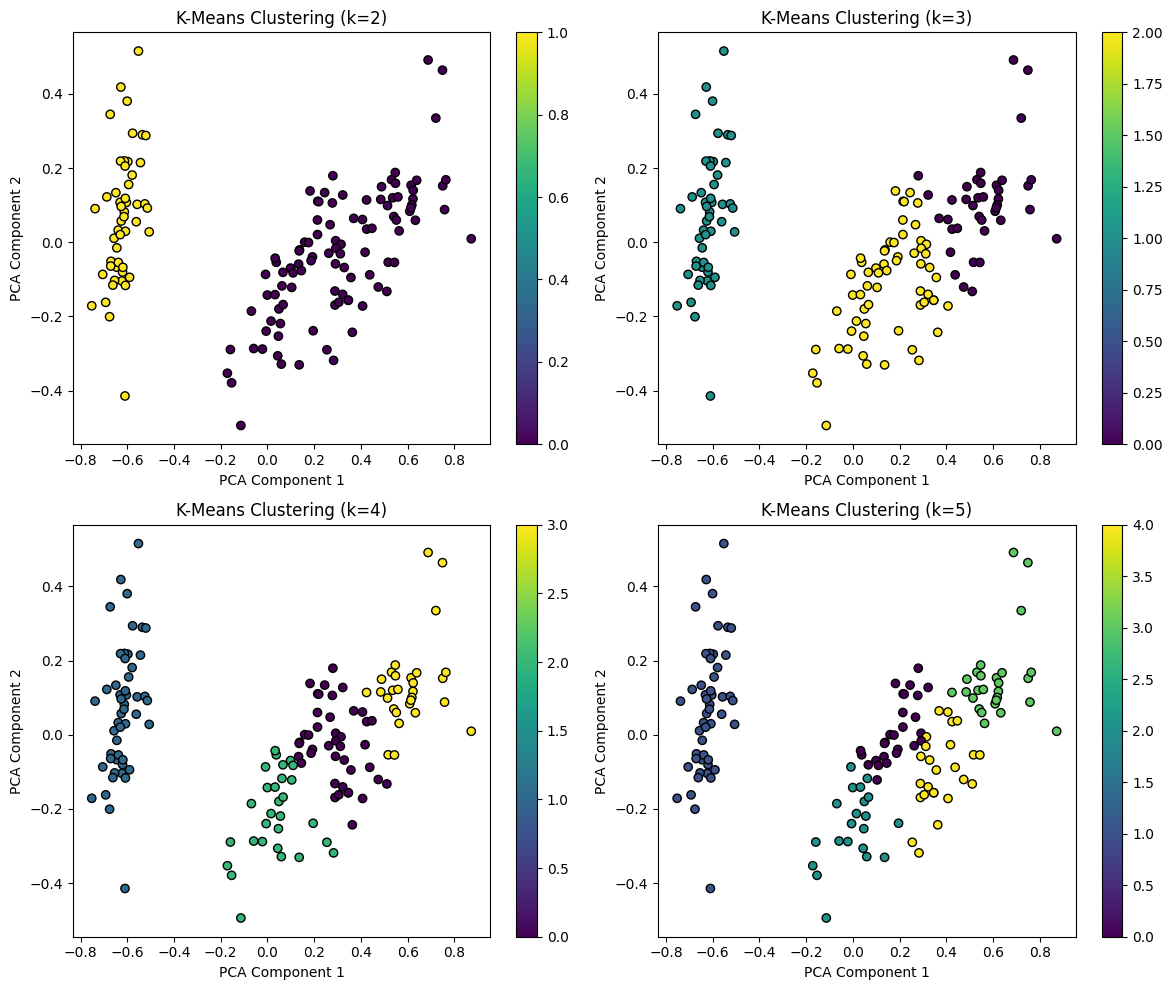

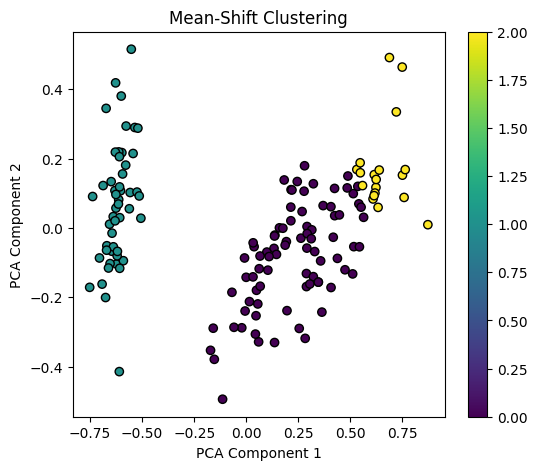

In [1]:
# Clustering Assignment - Google Colab Implementation

### **Step 1: Install Required Libraries**

!pip install numpy pandas matplotlib seaborn scikit-learn


### **Step 2: Import Necessary Libraries**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

### **Step 3: Load and Preprocess Dataset**

# Load Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardization (Z-score Scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(data)

# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_minmax_data = pca.fit_transform(minmax_data)


### **Step 4: Apply Clustering Algorithms**

# Estimate Bandwidth for Mean-Shift
bandwidth = estimate_bandwidth(minmax_data, quantile=0.2, n_samples=100)

# Clustering Models
kmeans = KMeans(n_clusters=3, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=3)
meanshift = MeanShift(bandwidth=bandwidth)

# Fit Models & Get Labels
data['KMeans_Labels'] = kmeans.fit_predict(minmax_data)
data['Hierarchical_Labels'] = hierarchical.fit_predict(minmax_data)
data['MeanShift_Labels'] = meanshift.fit_predict(minmax_data)


### **Step 5: Evaluate Clustering Performance & Save Results**

evaluation_results = []
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(minmax_data)
    hierarchical = AgglomerativeClustering(n_clusters=k).fit(minmax_data)

    evaluation_results.append({
        "Clusters": k,
        "Algorithm": "K-Means",
        "Silhouette Score": silhouette_score(minmax_data, kmeans.labels_),
        "Davies-Bouldin Index": davies_bouldin_score(minmax_data, kmeans.labels_),
        "Calinski-Harabasz Index": calinski_harabasz_score(minmax_data, kmeans.labels_)
    })

    evaluation_results.append({
        "Clusters": k,
        "Algorithm": "Hierarchical",
        "Silhouette Score": silhouette_score(minmax_data, hierarchical.labels_),
        "Davies-Bouldin Index": davies_bouldin_score(minmax_data, hierarchical.labels_),
        "Calinski-Harabasz Index": calinski_harabasz_score(minmax_data, hierarchical.labels_)
    })

evaluation_results.append({
    "Clusters": "Auto",
    "Algorithm": "Mean-Shift",
    "Silhouette Score": silhouette_score(minmax_data, data['MeanShift_Labels']),
    "Davies-Bouldin Index": davies_bouldin_score(minmax_data, data['MeanShift_Labels']),
    "Calinski-Harabasz Index": calinski_harabasz_score(minmax_data, data['MeanShift_Labels'])
})

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df.to_csv("clustering_evaluation.csv", index=False)  # Save evaluation results to CSV
print("Evaluation results saved as clustering_evaluation.csv")
print(evaluation_df)

### **Step 6: Save Cluster Assignments**

data.to_csv("cluster_assignments.csv", index=False)  # Save cluster assignments to CSV
print("Cluster assignments saved as cluster_assignments.csv")

### **Step 7: Visualizing Clustering Results**

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, k in zip(axes.flatten(), [2, 3, 4, 5]):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_minmax_data)
    scatter = ax.scatter(pca_minmax_data[:, 0], pca_minmax_data[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k')
    ax.set_title(f"K-Means Clustering (k={k})")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

# Mean-Shift Clustering Visualization
plt.figure(figsize=(6, 5))
scatter = plt.scatter(pca_minmax_data[:, 0], pca_minmax_data[:, 1], c=data['MeanShift_Labels'], cmap='viridis', edgecolors='k')
plt.title("Mean-Shift Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter)
plt.show()
